In [51]:
import pandas as pd
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt


# Load without multi-index first
df = pd.read_csv("../data/merged.csv")

print(df.head(10))


        Price     ES=F     NQ=F
0      Ticker     ES=F     NQ=F
1        Date      NaN      NaN
2  2015-01-02  2046.25  4214.25
3  2015-01-05   2016.0  4161.75
4  2015-01-06   1994.5  4102.25
5  2015-01-07   2019.5   4151.5
6  2015-01-08   2055.0  4232.25
7  2015-01-09  2035.25  4200.75
8  2015-01-12   2022.5   4166.5
9  2015-01-13   2016.0   4158.5


In [44]:
import sys
sys.path.append("../src")


from signal_logic import compute_spread, compute_zscore, generate_signals


In [45]:
df = pd.read_csv("../data/merged.csv", index_col=0, parse_dates=True)

#drop junk rows
df = df[pd.to_datetime(df.index, errors='coerce').notna()]
df.index = pd.to_datetime(df.index)

#force to make numeric
df["ES=F"] = pd.to_numeric(df["ES=F"], errors='coerce')
df["NQ=F"] = pd.to_numeric(df["NQ=F"], errors='coerce')
df = df.dropna(subset=["ES=F", "NQ=F"])

#pick stocks
y = df["ES=F"]
x = df["NQ=F"]

/var/folders/jb/pk23bkyn13b2jj0ptqjmbskr0000gn/T/ipykernel_12434/548287165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/merged.csv", index_col=0, parse_dates=True)
/var/folders/jb/pk23bkyn13b2jj0ptqjmbskr0000gn/T/ipykernel_12434/548287165.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df.index, errors='coerce').notna()]


In [46]:
X = add_constant(x)
model = OLS(y, X).fit()
beta = model.params[1] #hedge ratio
print(f"Estimated beta (hedge ratio): {beta:.4f}")

Estimated beta (hedge ratio): 0.2241


/var/folders/jb/pk23bkyn13b2jj0ptqjmbskr0000gn/T/ipykernel_12434/1174150878.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1] #hedge ratio


In [49]:
signals = generate_signals(zscore, entry_threshold=2, exit_threshold=0.5)

#save csv of signals
signals.to_csv("../outputs/signals.csv")

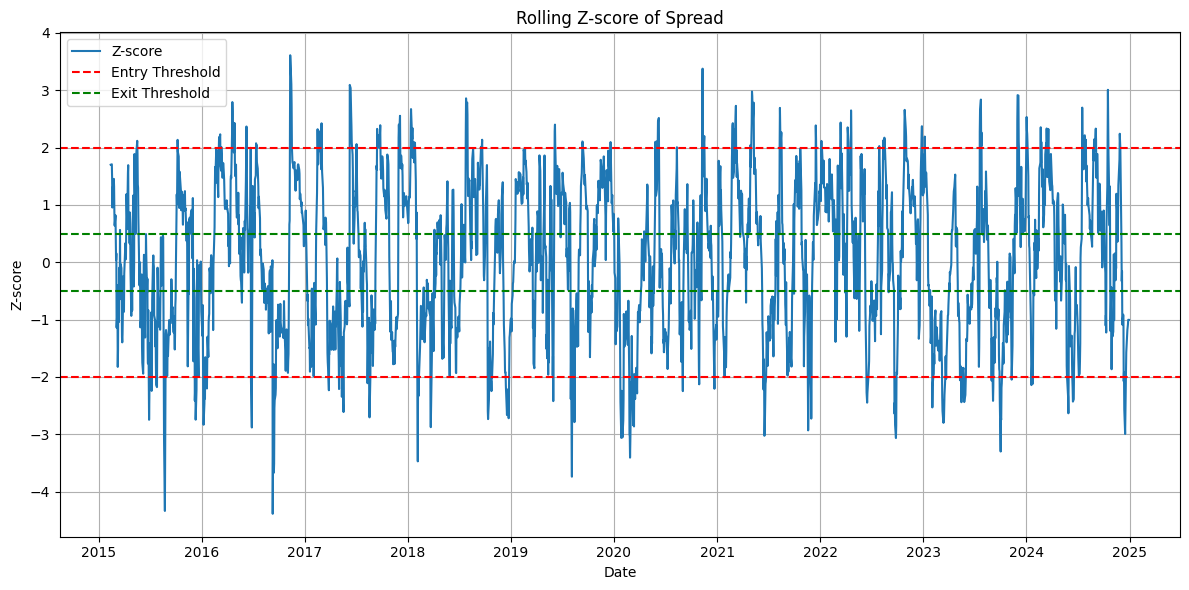

In [48]:
plt.figure(figsize=(12,6))
plt.plot(zscore, label="Z-score")
plt.axhline(2, color="red", linestyle="--", label="Entry Threshold")
plt.axhline(-2, color="red", linestyle="--")
plt.axhline(0.5, color="green", linestyle="--", label="Exit Threshold")
plt.axhline(-0.5, color="green", linestyle="--")
plt.title("Rolling Z-score of Spread")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()